# Assignment #5: Probability and Bootstrapping
## Foundations of Machine Learning
## ` ! git clone https://www.github.com/DS3001/the_bootstrap`
## Do two.

In [1]:
! git clone https://www.github.com/DS3001/the_bootstrap

Cloning into 'the_bootstrap'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 29 (delta 2), reused 1 (delta 1), pack-reused 22 (from 1)
Receiving objects: 100% (29/29), 1.95 MiB | 1.60 MiB/s, done.
Resolving deltas: 100% (3/3), done.


**Q1.** A die is fair if every face is equally likely. A die has six sides if it has six faces labelled 1, 2, ... , 6.

1. Imagine rolling two dice, $d_1$ and $d_2$. Let $R_{min}$ be the lesser value of the two face values. What is the probability of getting a 1, 2, 3, 4, 5, or 6? Which values are more or less likely compared to the roll of a single six-sided die? What is the expected value of $R_{min}$? Plot the probability and cumulative distribution functions for $R_{min}$. Compute this by hand and simulate it using the law of large numbers.
2. Imagine rolling three dice, $d_1$, $d_2$, and $d_3$. Let $R_{med}$ be the middle of the three face values. So if you roll 2, 3 and 4, the middle value is 3, and if you roll 2, 4, 4, the middle value is 4, and so on. What is the probability of getting a 1, 2, 3, 4, 5, or 6? Which values are more or less likely compared to the roll of a single six-sided die? What is the expected value of $R_{med}$? Plot the probability and cumulative distribution functions for $R_{med}$. I recommend using simulations and the law of large numbers.
3. Imagine rolling a die. If you roll 1, 2, 3, 4, or 5, add that number to your total and stop; if you roll a six, add that number to your total and roll the die again. So you could roll, say, two sixes and then a four, and get a total of 16, or one three and get a total of 3, or twelve sixes and 1 and get 72, and so on. Write code to simulate this process, and determine its expected value using the law of large numbers. What is the probability of getting a total of 1, 2, 3, ... and so on, in your simulation? I recommend using simulations and the law of large numbers.  (Hint: The `while` loop might be useful in this case.)

1. For a single six sided die there is a 1/6 chance for each number 1 - 6, and a 100% chance of getting a 1, 2, 3, 4, 5, or 6 (ha!). When rolling two six sided die you have a 36 possible options. 1/6 x 1/6 = 1/36. Each roll there is a 5/6 chance to not roll the target number so with 2 rolls there is a 25/36 chance of not rolling the number. This means there is an 11/36 chance of rolling at least one instance of each number if you roll two die. So 1 is the lowest possible value for rmin, so there is a 11/36 chance 1 is rmin. Now 2 is the lowest possible value. There are 5 different role combinations where the first roll is 2 and the next roll is higher than 1. There are 5 combinations where the second roll is 2 and the first roll is higher than 1. Two 2's happens in both so it is only counted once. This leaves a 1/4 chance of 2 being the lowest roll. The same pattern continues with each number 7/36 for 3, 5/36 for 4, 1/12 for 5, 1/36 for 6. When rolling 2 die, 1, 2, and 3 have a greater chance of being the low roll compared to being rolled on a single sided die. Had to do some high school probability review here ^ hope it addressed the question.  

[0.30555556 0.25       0.19444444 0.13888889 0.08333333 0.02777778]
[0.2972 0.5521 0.7497 0.8848 0.9696 1.    ]


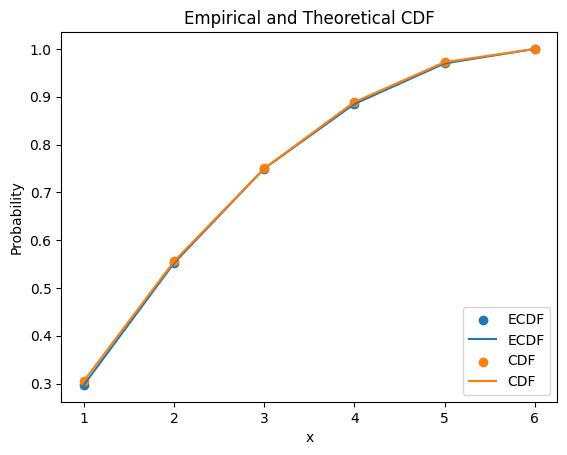

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#Setting up the die

die = np.array([1, 2, 3, 4, 5, 6])
die1 = np.array([1, 2, 3, 4, 5, 6])
die2 = np.array([1, 2, 3, 4, 5, 6])

roll1 = np.random.choice(die1, 10000)
roll2 = np.random.choice(die2, 10000)

rmin = [np.minimum(roll1, roll2) for i in range(10000)]

#Probability distribution function is the probability that X = x or is between a given interval given f(x)
#Cumulative distribution function: chances that X is less than x given f(x)

pdf = np.zeros(6)
for i in range(6):
    for j in range(6):
        min_ij = np.min([die[i],die[j]])
        pdf[min_ij-1] += 1

pdf = pdf/36
print(pdf)
cdf = np.cumsum(pdf)


#Using law of large numbers
N = 10000
lncdf = np.zeros(6)
for i in range(6):
  lncdf[i] = (1/N)*np.sum(rmin <= die[i])/10000 #cheeky

print(lncdf)


plt.scatter(die,lncdf,label='ECDF')
plt.plot(die,lncdf,label='ECDF')
plt.scatter(die,cdf,label='CDF')
plt.plot(die,cdf,label='CDF')
plt.xlabel("x")
plt.ylabel("Probability")
plt.legend(loc='lower right')
plt.title('Empirical and Theoretical CDF')
plt.show()

#2

Expected value:  3.4981


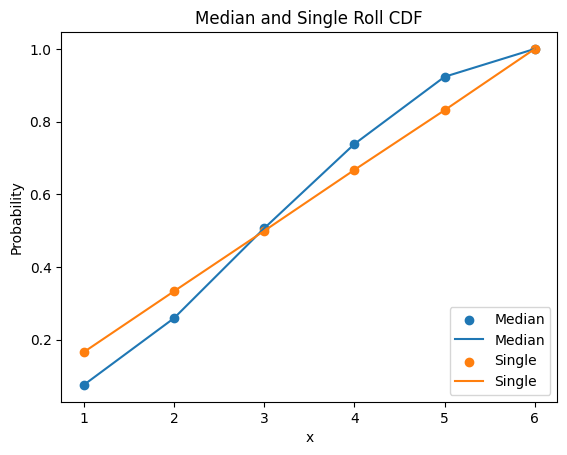

In [3]:
#Wow that first part took much longer than imagined hopefully I've gotten it down better now.

roll3 = np.random.choice(die, size=N)
med_roll = [ int(np.median([roll1[i], roll2[i], roll3[i]])) for i in range(N) ]

expected_value = np.sum(med_roll)/N
print('Expected value: ', expected_value)

lncdf = np.zeros(6)
single = np.zeros(6)
for i in range(6):
    lncdf[i] = (1/N)*np.sum( med_roll <= die[i] )
    single[i] = (1/N)*np.sum( roll1 <= die[i] )

expected_value = np.sum(med_roll)/N

# # Comparison:
plt.scatter(die,lncdf,label='Median')
plt.plot(die,lncdf,label='Median')
plt.scatter(die,single,label='Single')
plt.plot(die,single,label='Single')
plt.xlabel("x")
plt.ylabel("Probability")
plt.legend(loc='lower right')
plt.title('Median and Single Roll CDF')
plt.show()


#3 Personal reminder:
Imagine rolling a die. If you roll 1, 2, 3, 4, or 5, add that number to your total and stop; if you roll a six, add that number to your total and roll the die again. So you could roll, say, two sixes and then a four, and get a total of 16, or one three and get a total of 3, or twelve sixes and 1 and get 72, and so on. Write code to simulate this process, and determine its expected value using the law of large numbers. What is the probability of getting a total of 1, 2, 3, ... and so on, in your simulation? I recommend using simulations and the law of large numbers. (Hint: The while loop might be useful in this case.)

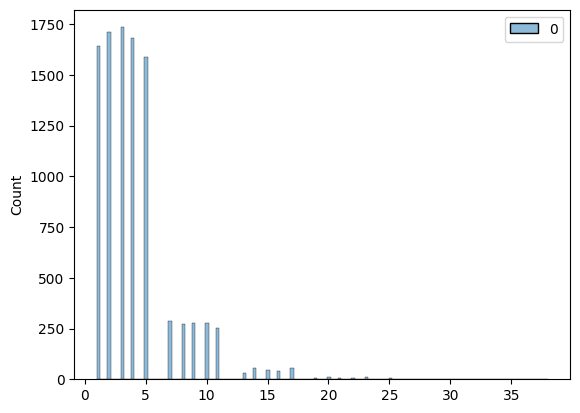

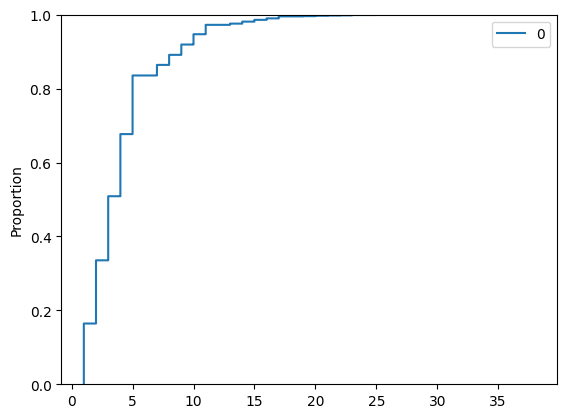

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
die = np.array([1, 2, 3, 4, 5, 6])
number = np.random.choice(die)

#rolling

N = 10000
results = []
for i in range(N):
    roll = True
    total = 0
    while roll is True:
        number = np.random.choice(die, size=1)
        total += number
        if number < 6:
            roll = False
            results.append(int(total[0]))

results = pd.DataFrame(results)

sns.histplot(results)
plt.show()

sns.ecdfplot(results)
plt.show()




**Q2.** This question refers to the `mammogram.csv` data. It has two variables, `treatment` which takes the values `control` or `mammogram`, and `breast_cancer_death`, which takes the values `no` or `yes`. This is an experiment that followed 89,835 women for 25 years to see if mammograms were superior to more traditional breast cancer screenings in preventing breast cancer deaths.

1. Cross tabulate `treatment` and `breast_cancer_death`. What is the difference in 25-year survival rates between the control and mammogram groups?
2. Bootstrap the densities and distributions of survival rates for the two groups.
3. Construct a 99% confidence interval for the difference in outcomes bewteen the two groups. Does it include zero?
4. We're not doctors, these were just some intriguing data, and the information about the patients is extremely sparse. Why might these data over/understate the conclusions you've reached? What other data would you like to have to better understand or criticize your results?

In [12]:

df = pd.read_csv('/content/the_bootstrap/data/mammogram.csv')

#cross tabulate
crosstab = pd.crosstab(df['treatment'], df['breast_cancer_death'])
print(crosstab)

survival_rate_control = 44405/44910
survival_rate_treatment = 44425/44910

print(survival_rate_control)
print(survival_rate_treatment)

breast_cancer_death     no  yes
treatment                      
control              44405  505
mammogram            44425  500
0.9887552883544868
0.9892006234691605


No difference in survival rate

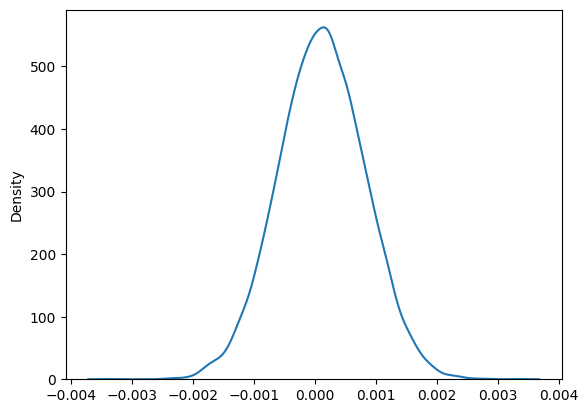

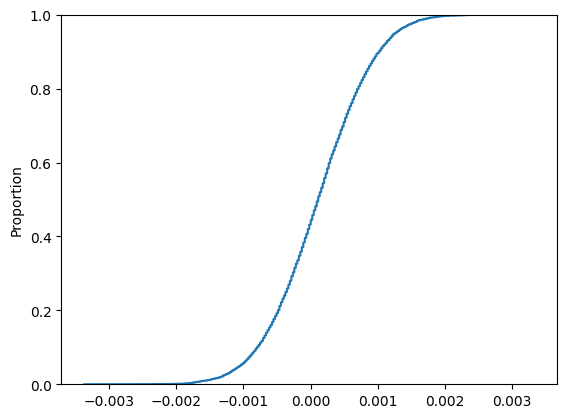

In [14]:
#Bootstrap the densities and distributions of survival rates for the two groups.

N = 10000
control_survival_rates = []
treatment_survival_rates = []

#realizing not totally sure how to do this
df['survive'] = 0
df.loc[ df['breast_cancer_death'] == 'no', 'survive'] = 1

df_treat = df.loc[ df['treatment'] == 'mammogram', :]
df_control = df.loc[ df['treatment'] == 'control', :]

fx = []
for t in range(N):
    df_treat_t = df_treat.sample( df_treat.shape[0], axis=0, replace=True)
    df_control_t = df_control.sample( df_control.shape[0], axis=0, replace=True)
    #
    treatment_effect_t = np.mean(df_treat_t['survive']) - np.mean(df_control_t['survive'])
    fx.append(treatment_effect_t)

sns.kdeplot(fx)
plt.show()

sns.ecdfplot(fx)
plt.show()

The interval includes 0.

There are a variety of factors that might influence this data. Perhaps women more able and interested in bettering there health are more likely to get mammograms. This would leave out a large population where detection with mammograms may be more influential. I would wonder who participated in this study and demographics were represented socioeconomically. It is also important to consider other effects of cancer besides death. Maybe mammograms lead to less breast removal surgeries.

**Q3.** This question refers to the `diabetes_hw.csv` data. It contains two variables, `outcome` and `treatment`. Each is looking at whether an individual's diabetes was successfully treated (`outcome==success`) with `lifestyle` interventions like exercises and diets, a drug denoted by `met` (metformin), or a drug denoted by `rosi` (rosiglitazone), or not (`outcome==failure`). Treatment success means that the individual no longer needs to be treated with insulin, while failure means the patient still required insulin injections after treatment.

1. Cross tabulate `treatment` and `outcome`.
2. Compute the the proportion of successes for each treatment. Which treatment appears to be the most effective?
3. Bootstrap the density and distribution of the proportion of successes for each interventions. Create empirical CDF and kernel density plots that are grouped  by treatment type. Which treatment appears to be the most effective?
4. For each comparison (lifestyle versus met, met versus rosi, rosi versus lifestyle), bootstrap the distribution of the difference in outcomes. At the 90% level of confidence, which pairwise treatment comparisons are significantally different?
5. Which treatment appears to be the most effective overall?

**Q4.** The goal of the question is to incorporate features/covariates/predictors/explanatory variables into the kind of treatment effect comparisons done in the previous questions. This question refers to the `heart_hw.csv` data. It contains three variables:

  - `y`: Whether the individual survived, coded 0 for death and 1 for survival
  - `age`: Patient's age
  - `transplant`: `control` for not receiving a transplant and `treatment` for receiving a transplant

1. Compute (a) the proportion of people who survive in the control group who do not receive a transplant, and (b) the difference between the proportion of people who survive in the treatment group and the proportion of people who survive in the control group (the average treatment effect).
2. Regress `y` on `transplant` using a linear model. How does the constant/intercept of the regression and the coefficient on transplant compare to your answers from part 1? Explain carefully.
3. We'd like to include `age` in the regression, since it's reasonable to expect that older patients are less likely to survive an extensive surgery like a heart transplant. Regress `y` on transplant, age, and transplant $\times$ age. You can do this using a linear regression. How do the intercept and the coefficient on `transplanttreatment` change?
4. Build a more flexible model that allows for non-linear age effects and interactions between age and treatment. Estimate the model, and plot the predicted survival probability by age, hued for people who receive a heart transplant and those who don't. Describe what you see.
5. Imagine someone suggests using these kinds of models to select who receives organ transplants; perhaps the CDC or NIH starts using a scoring algorithm to decide who is contacted about a potential organ transplant. What are your concerns about how it is built and how it is deployed?